In [1]:
import alpaca_trade_api as tradeapi
import pandas as pd
import datetime as dt

In [7]:
# Replace 'YOUR_API_KEY' and 'YOUR_SECRET_KEY' with your actual API keys
API_KEY = 'PK58SXLOXJ0MCMQBJZVT'
SECRET_KEY = 'fYlO75pUZ3GG7rYTuBvKio21wMyXVSwQn2CB6bIT'

# Initialize the Alpaca API client
api = tradeapi.REST(API_KEY, SECRET_KEY, base_url='https://paper-api.alpaca.markets', api_version='v2')

# Get historical stock data
stockData = api.get_bars('NVD', '1D').df # 1D for daily data, 1H for hourly, etc.

# Print the retrieved data
stockData

""


In [3]:
# Define the Alpaca stock symbol and date range
symbol = 'AAPL'
start_date = '2000-01-01'
end = dt.date.today() - dt.timedelta(days=1)
end_date = end.strftime('%Y-%m-%d')

In [4]:
# Download historical stock data using alpaca
stockData = tradeapi.download(symbol, start=start_date, end=end_date)
stockData = stockData.dropna()
stockData

AttributeError: module 'alpaca_trade_api' has no attribute 'download'

In [2]:
stockData = yf.download('BTC-EUR', period='max')
stockData = stockData.dropna()
stockData

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625
...,...,...,...,...,...,...
2023-09-13,23410.583984,24645.748047,23403.671875,24023.845703,24023.845703,17350430194
2023-09-14,24027.763672,24548.669922,23960.486328,24437.322266,24437.322266,12179450287
2023-09-15,24437.279297,25165.308594,24351.880859,24954.433594,24954.433594,12986392832


In [3]:
stockData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3288 entries, 2014-09-17 to 2023-09-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3288 non-null   float64
 1   High       3288 non-null   float64
 2   Low        3288 non-null   float64
 3   Close      3288 non-null   float64
 4   Adj Close  3288 non-null   float64
 5   Volume     3288 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 179.8 KB


In [4]:
stockData.index.values

array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
       '2014-09-19T00:00:00.000000000', ...,
       '2023-09-15T00:00:00.000000000', '2023-09-16T00:00:00.000000000',
       '2023-09-17T00:00:00.000000000'], dtype='datetime64[ns]')

In [5]:
stockData.index = pd.to_datetime(stockData.index)
stockData['Year'] = stockData.index.year
stockData['Year']

Date
2014-09-17    2014
2014-09-18    2014
2014-09-19    2014
2014-09-20    2014
2014-09-21    2014
              ... 
2023-09-13    2023
2023-09-14    2023
2023-09-15    2023
2023-09-16    2023
2023-09-17    2023
Name: Year, Length: 3288, dtype: int64

Calcular os retornos diários para cstockData ação.

Isso pode ser feito usando a fórmula (preço atual - preço anterior) / preço anterior.

In [6]:
stockData["Result"] = stockData['Close'].pct_change()
stockData

,Open,High,Low,Close,Adj Close,Volume,Year,Result
Date,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166,2014,NaN
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,2014,-0.077026
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103,2014,-0.063244
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826,2014,0.035735
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625,2014,-0.025494
...,...,...,...,...,...,...,...,...
2023-09-13,23410.583984,24645.748047,23403.671875,24023.845703,24023.845703,17350430194,2023,0.026115
2023-09-14,24027.763672,24548.669922,23960.486328,24437.322266,24437.322266,12179450287,2023,0.017211
2023-09-15,24437.279297,25165.308594,24351.880859,24954.433594,24954.433594,12986392832,2023,0.021161


In [7]:
stockData['Tomorrow'] = stockData['Close'].shift(-1)
stockData['Target'] = (stockData['Tomorrow'] > stockData['Close']).astype(int)
stockData

,Open,High,Low,Close,Adj Close,Volume,Year,Result,Tomorrow,Target
Date,,,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166,2014,NaN,328.539368,0
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,2014,-0.077026,307.761139,0
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103,2014,-0.063244,318.758972,1
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826,2014,0.035735,310.632446,0
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625,2014,-0.025494,312.958771,1
...,...,...,...,...,...,...,...,...,...,...
2023-09-13,23410.583984,24645.748047,23403.671875,24023.845703,24023.845703,17350430194,2023,0.026115,24437.322266,1
2023-09-14,24027.763672,24548.669922,23960.486328,24437.322266,24437.322266,12179450287,2023,0.017211,24954.433594,1
2023-09-15,24437.279297,25165.308594,24351.880859,24954.433594,24954.433594,12986392832,2023,0.021161,24936.523438,0


# Construção do Modelo

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = stockData.iloc[:-100]
test = stockData.iloc[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [9]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [10]:
preds = pd.Series(preds, index=test.index)
preds

Date
2023-06-10    1
2023-06-11    0
2023-06-12    1
2023-06-13    1
2023-06-14    0
             ..
2023-09-13    0
2023-09-14    1
2023-09-15    0
2023-09-16    1
2023-09-17    1
Length: 100, dtype: int64

In [11]:
precision_score(test['Target'], preds)

0.42424242424242425

<AxesSubplot: xlabel='Date'>

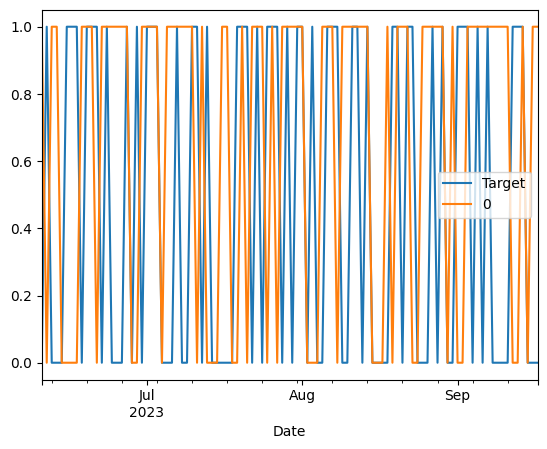

In [12]:
combined = pd.concat([test['Target'], preds], axis=1)
combined.plot()

## Backtesting

In [13]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

É preciso descobrir quantos dados há em um ano, para cobrir um ano da área de teste, aproximstockDatamente.

In [14]:
stockData["Year"].value_counts()

2016    366
2020    366
2015    365
2017    365
2018    365
2019    365
2021    365
2022    365
2023    260
2014    106
Name: Year, dtype: int64

In [15]:
def backtest (data, model, predictors, start=40, step=360):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [16]:
stockData.shape[0]

3288

In [17]:
predictions = backtest(stockData, model, predictors)

In [18]:
predictions["Predictions"].value_counts()

0    2151
1    1097
Name: Predictions, dtype: int64

In [19]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5168641750227895

In [20]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.532328
0    0.467672
Name: Target, dtype: float64

## Adicionar Preditores Adicionais ao Modelo

Verificando o horizonte de eventos anterior (2 dias, 5 dias, 60 dias, etc)

In [21]:
horizons = [2, 5, 60, 250, 800]
new_predictors = []

for horizon in horizons:
    rolling_averages = stockData.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    stockData[ratio_column] = stockData["Close"] / rolling_averages["Close"]

    trend_column = f'Trend_{horizon}'
    stockData[trend_column] = stockData.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]


In [22]:
stockData = stockData.dropna()

In [23]:
stockData

,Open,High,Low,Close,Adj Close,Volume,Year,Result,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_800,Trend_800
Date,,,,,,,,,,,,,,,,,,,,
2016-11-25,701.242554,700.329529,692.291992,700.329529,700.329529,64029839,2016,-0.001096,694.411743,0,0.999452,0.0,0.997696,2.0,1.135675,36.0,1.335814,144.0,1.992768,427.0
2016-11-26,700.199219,700.863098,688.975464,694.411743,694.411743,51900567,2016,-0.008450,690.208374,0,0.995757,0.0,0.989462,1.0,1.121413,36.0,1.321235,143.0,1.973361,427.0
2016-11-27,694.463684,697.845154,689.963196,690.208374,690.208374,49596266,2016,-0.006053,693.117004,1,0.996964,0.0,0.988131,0.0,1.110102,36.0,1.310072,142.0,1.958755,427.0
2016-11-28,690.631714,697.482239,690.436401,693.117004,693.117004,58297476,2016,0.004214,691.032410,0,1.002103,1.0,0.996097,1.0,1.110223,36.0,1.312413,142.0,1.964401,427.0
2016-11-29,693.603027,694.809692,693.307251,691.032410,691.032410,64359891,2016,-0.003008,704.279358,1,0.998494,1.0,0.995983,1.0,1.102507,35.0,1.305323,142.0,1.955857,427.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-12,24104.503906,24124.251953,23192.755859,23412.441406,23412.441406,13584488417,2023,-0.028730,24023.845703,1,0.985426,0.0,0.972055,1.0,0.914397,28.0,0.960320,123.0,0.797593,399.0
2023-09-13,23410.583984,24645.748047,23403.671875,24023.845703,24023.845703,17350430194,2023,0.026115,24437.322266,1,1.012889,1.0,1.001652,1.0,0.940085,29.0,0.984086,124.0,0.818576,400.0
2023-09-14,24027.763672,24548.669922,23960.486328,24437.322266,24437.322266,12179450287,2023,0.017211,24954.433594,1,1.008532,2.0,1.016833,2.0,0.957842,30.0,0.999625,124.0,0.832825,400.0


In [24]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=10, random_state=1)

In [25]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0    
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [26]:
predictions = backtest(stockData, model, new_predictors)

In [27]:
predictions['Predictions'].value_counts()

0.0    1389
1.0    1058
Name: Predictions, dtype: int64

In [28]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5482041587901701